In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

df.head()


Saving bestsellers with categories.csv to bestsellers with categories (2).csv


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
dataset_shape = df.shape
print(f"Розмір датасету: {dataset_shape}")


books_count = dataset_shape[0]
print(f"Відповідь: Про {books_count} книг зберігає дані датасет.")


df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


Розмір датасету: (550, 7)
Відповідь: Про 550 книг зберігає дані датасет.


In [ ]:
missing_values = df.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)


if missing_values.sum() == 0:
    print("Відповідь: Ні")
else:
    print("Відповідь: Так")


unique_genres = df['genre'].unique()
print(f"Унікальні жанри: {unique_genres}")


print(f"Відповідь: {', '.join(unique_genres)}")


Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Відповідь: Ні
Унікальні жанри: ['Non Fiction' 'Fiction']
Відповідь: Non Fiction, Fiction


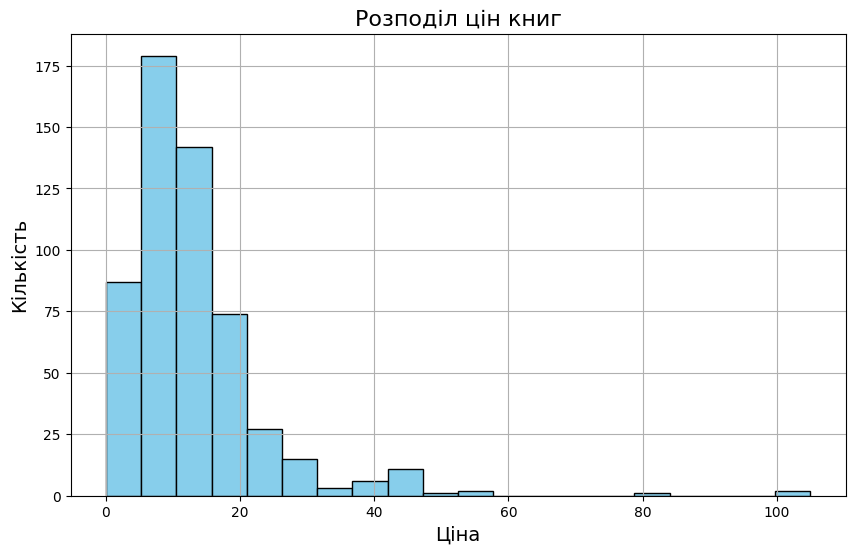

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл цін книг', fontsize=16)
plt.xlabel('Ціна', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")


print(f"Відповідь: Максимальна ціна: {max_price}")
print(f"Відповідь: Мінімальна ціна: {min_price}")
print(f"Відповідь: Середня ціна: {mean_price}")
print(f"Відповідь: Медіанна ціна: {median_price}")


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0
Відповідь: Максимальна ціна: 105
Відповідь: Мінімальна ціна: 0
Відповідь: Середня ціна: 13.1
Відповідь: Медіанна ціна: 11.0


In [ ]:
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг: {max_rating}")

print(f"Відповідь: {max_rating}")

books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Кількість книг з найвищим рейтингом: {books_with_max_rating}")

print(f"Відповідь: {books_with_max_rating}")

most_reviews_book = df.loc[df['reviews'].idxmax()]
print(f"Книга з найбільшою кількістю відгуків: {most_reviews_book['name']}")

print(f"Відповідь: {most_reviews_book['name']}")


Найвищий рейтинг: 4.9
Відповідь: 4.9
Кількість книг з найвищим рейтингом: 52
Відповідь: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Відповідь: Where the Crawdads Sing


In [ ]:
most_expensive_2015_book = df[(df['year'] == 2015)].sort_values('price', ascending=False).iloc[0]
print(f"Найдорожча книга 2015 року: {most_expensive_2015_book['name']}")

print(f"Відповідь: {most_expensive_2015_book['name']}")


Найдорожча книга 2015 року: Publication Manual of the American Psychological Association, 6th Edition
Відповідь: Publication Manual of the American Psychological Association, 6th Edition


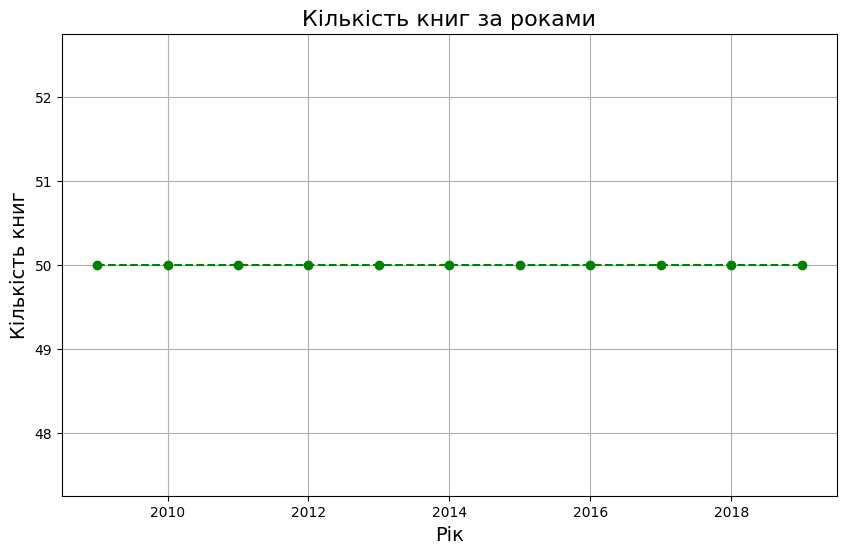

In [ ]:
books_per_year = df.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', color='green', linestyle='--')
plt.title('Кількість книг за роками', fontsize=16)
plt.xlabel('Рік', fontsize=14)
plt.ylabel('Кількість книг', fontsize=14)
plt.grid(True)
plt.show()


<ipython-input-13-61ad2b4604a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='price', data=df, palette='Set2')


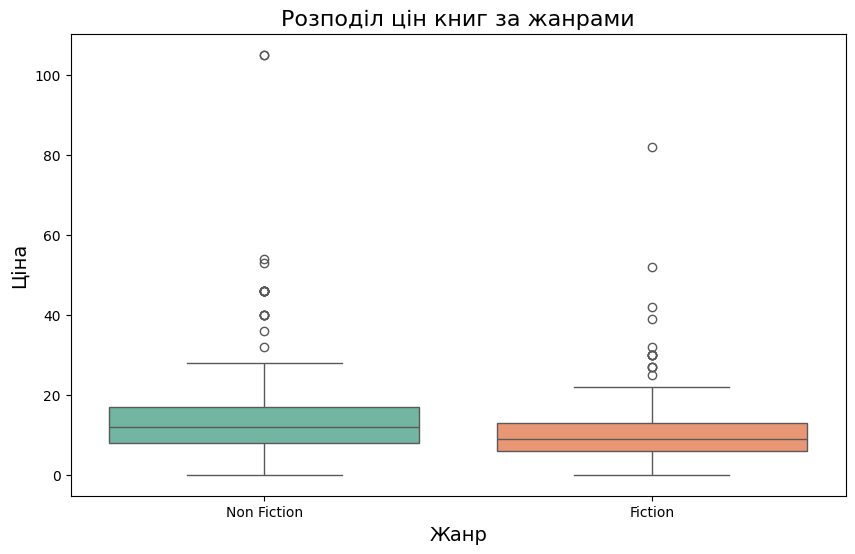

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='price', data=df, palette='Set2')
plt.title('Розподіл цін книг за жанрами', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Ціна', fontsize=14)
plt.show()


In [ ]:
fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(f"Кількість книг жанру Fiction у 2010 році: {fiction_books_2010}")

print(f"Відповідь: {fiction_books_2010}")

books_with_4_9_rating = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {books_with_4_9_rating}")

print(f"Відповідь: {books_with_4_9_rating}")


Кількість книг жанру Fiction у 2010 році: 20
Відповідь: 20
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1
Відповідь: 1


In [ ]:
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
last_sorted_book = sorted_books_2015_under_8.iloc[-1]['name']
print(f"Остання книга у відсортованому списку: {last_sorted_book}")

print(f"Відповідь: {last_sorted_book}")


Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)
Відповідь: Old School (Diary of a Wimpy Kid #10)


In [ ]:
genre_price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
print(genre_price_stats)

print(genre_price_stats)


             max  min
genre                
Fiction       82    0
Non Fiction  105    0
             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [ ]:
books_per_author = df.groupby('author').agg({'name': 'count'}).rename(columns={'name': 'book_count'})
print(f"Розмір таблиці: {books_per_author.shape}")

print(f"Відповідь: {books_per_author.shape}")

top_author = books_per_author['book_count'].idxmax()
top_author_books = books_per_author['book_count'].max()
print(f"Автор з найбільшою кількістю книг: {top_author}")
print(f"Кількість книг цього автора: {top_author_books}")

print(f"Відповідь: {top_author}")

print(f"Відповідь: {top_author_books}")


Розмір таблиці: (248, 1)
Відповідь: (248, 1)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12
Відповідь: Jeff Kinney
Відповідь: 12


In [ ]:
avg_rating_per_author = df.groupby('author')['user_rating'].agg(['mean']).rename(columns={'mean': 'avg_rating'})
print(avg_rating_per_author)

min_avg_rating_author = avg_rating_per_author['avg_rating'].idxmin()
min_avg_rating = avg_rating_per_author['avg_rating'].min()
print(f"Автор з мінімальним середнім рейтингом: {min_avg_rating_author}")
print(f"Середній рейтинг цього автора: {min_avg_rating}")

print(f"Відповідь: {min_avg_rating_author}")

print(f"Відповідь: {min_avg_rating}")

final_df = pd.concat([books_per_author, avg_rating_per_author], axis=1)

sorted_final_df = final_df.sort_values(by=['book_count', 'avg_rating'])

first_author = sorted_final_df.iloc[0].name
print(f"Перший автор у списку після сортування: {first_author}")

print(f"Відповідь: {first_author}")


                            avg_rating
author                                
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
...                                ...
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000

[248 rows x 1 columns]
Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9
Відповідь: Donna Tartt
Відповідь: 3.9
Перший автор у списку після сортування: Muriel Barbery
Відповідь: Muriel Barbery
